In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,solve_ivp
from scipy.interpolate import interp1d
import scipy.integrate as integrate

In [2]:
def model(y,t):
    return np.abs(y**2+l**2)**(1.5)*2*c1/l

def rhs(t,h):
    return [-1j*(h[0]*(fDelta(t))+l*h[1])/2,-1j*(-h[1]*fDelta(t)+l*h[0])/2]

In [3]:
g=1.35
muB=9.27*10**(-24)
B=0.015
ET=-g*muB*B
hbar=1.055*10**(-34)
l=0.1*1.6*10**(-19)*10**(-6)/(hbar/2)
tau=5*1.6*10**(-19)*10**(-6)
u=3000*1.6*10**(-19)*10**(-6)

In [4]:
print(l)
print(tau)

303317535.54502374
7.999999999999999e-25


In [5]:
Es=lambda eps:(u+eps-np.sqrt(8*tau**2+(u+eps)**2))/2
Delta=lambda eps: ((Es(eps)-ET)/2)/(hbar/2)

eps0=-3050*1.6*10**(-19)*10**(-6)
epstf=-2800*1.6*10**(-19)*10**(-6)
N=10000000

deltas=np.linspace(Delta(eps0),Delta(epstf),N,endpoint=True)
c1=np.sum(1/np.abs((l**2+deltas**2)**(1.5)/l))*np.abs((deltas[0]-deltas[1]))/2
c1_=integrate.quad(lambda e: 1/np.abs((l**2+e**2)**(1.5)/l), Delta(eps0),Delta(epstf))[0]/2
print(c1)
print(c1_)

3.2595172113696094e-09
3.8717182787057905e-09


In [6]:
n=100
nt=1000
DF=np.zeros([nt,3,n])
Eps=np.zeros([nt,n])

s=np.linspace(0,1,nt)

for i,tf in enumerate(np.linspace(0.1,30,n)*10**(-9)):
    t0=np.linspace(0,tf,nt,endpoint=True)
    delta_sol=odeint(model,Delta(eps0),s)[:,0]
    Deps=-(2*tau**2-(delta_sol*hbar+ET)**2)/(delta_sol*hbar+ET)-u
    fDelta=interp1d(t0, delta_sol, kind='cubic',fill_value="extrapolate")
    res=solve_ivp(rhs,(0,tf),[1+0j,0j],t_eval=t0)
    h1,h2=np.abs(res.y)**2
    DF[:,0,i]=t0
    DF[:,1,i]=h1
    DF[:,2,i]=h2
    Eps[:,i]=Deps
factor1=-(Eps+u+np.sqrt((Eps+u)**2+8*tau**2))/(2*np.sqrt(2)*tau)
factor2=Eps*0+1
factor1_normalized=factor1/np.sqrt(factor1**2+factor2**2)
factor2_normalized=factor2/np.sqrt(factor1**2+factor2**2)

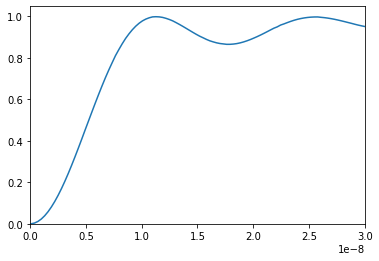

In [7]:
plt.plot(DF[-1,0,:],DF[-1,2,:]*factor1_normalized[-1,:]**2)
plt.ylim(0)
plt.xlim([0,30*10**(-9)]);

In [8]:
print(np.max(DF[-1,2,:]))

0.9999788662574381


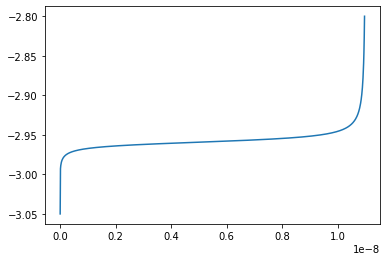

In [9]:
index=36
plt.plot(DF[:,0,index],Eps[:,index]/(1.6*10**(-19)*10**(-3)))

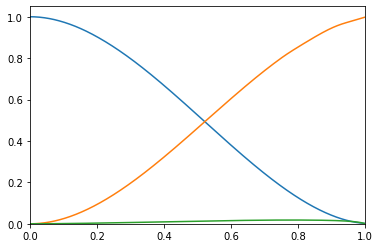

In [10]:
tf_=DF[-1,0,index]
plt.plot(DF[:,0,index]/tf_,DF[:,1,index])
plt.plot(DF[:,0,index]/tf_,DF[:,2,index]*factor1_normalized[:,index]**2)
plt.plot(DF[:,0,index]/tf_,DF[:,2,index]*factor2_normalized[:,index]**2)
plt.ylim(0)
plt.xlim([0,1]);

In [11]:
np.max(DF[:,2,index]*factor2_normalized[:,index]**2)*100

1.816597353632791

0.004391532400447984

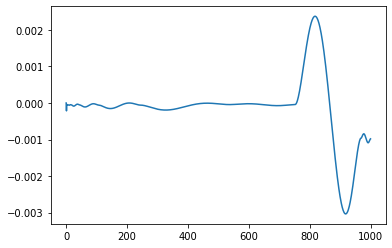

In [12]:
plt.plot(1-(DF[:,1,index]+DF[:,2,index]))

np.max(1-(DF[:,1,:]+DF[:,2,:]))

0.1373855002367869

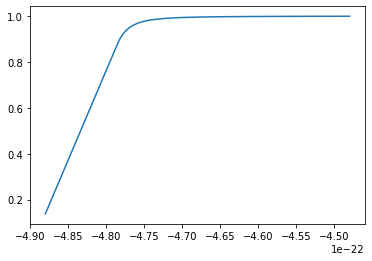

In [13]:
plt.plot(Eps[:,index],np.abs(factor1_normalized[:,-1]))
np.abs(factor1_normalized[0,-1])

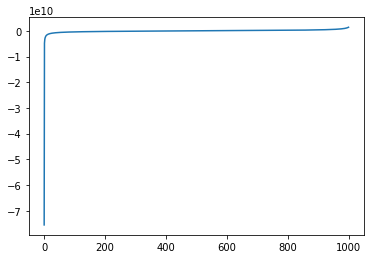

In [14]:
plt.plot(delta_sol)